In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv(r'D:\Projects\alooo\Project\model\dataset\Cellphone.csv')

In [5]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [8]:
df.drop(['weight', 'Product_id', 'thickness'], inplace=True, axis=1)

In [9]:
df.head()

,Price,Sale,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery
0,2357,10,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610
1,1749,10,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700
2,1916,10,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000
3,1315,11,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400
4,1749,11,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700


In [10]:
Price = df['Price']
df.drop(columns=['Price'],inplace=True, axis=1)
df['Price'] = Price

In [11]:
df.head()

,Sale,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,Price
0,10,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,2357
1,10,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,1749
2,10,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,1916
3,11,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,1315
4,11,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,1749


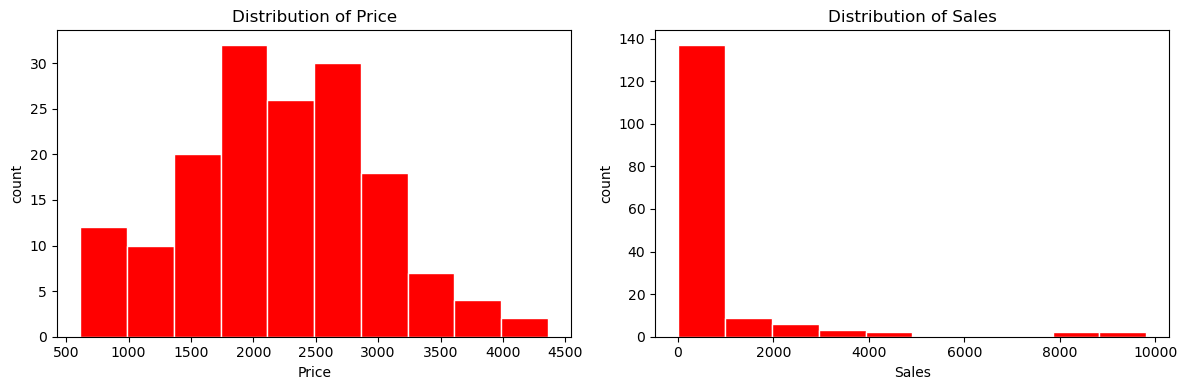

In [12]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

axes[0].hist(df['Price'], bins=10, edgecolor='white', color='red')
axes[0].set_title('Distribution of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('count')

axes[1].hist(df['Sale'], bins=10, edgecolor='white', color='red')
axes[1].set_title('Distribution of Sales')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('count')
plt.tight_layout()
plt.show()

In [13]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices

outlier_indices = outliers(df, 'ram')
# Convert to DataFrame
outlier_indices_df = pd.DataFrame(outlier_indices, columns=['Outlier_Index'])
outlier_indices_df

,Outlier_Index


In [14]:
df.shape

(161, 11)

In [15]:
df.drop(outlier_indices)

,Sale,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,Price
0,10,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,2357
1,10,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,1749
2,10,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,1916
3,11,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,1315
4,11,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,1749
...,...,...,...,...,...,...,...,...,...,...,...
156,4638,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,3551
157,8016,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,3211
158,8809,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,3260
159,8946,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,3211


In [16]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices

outlier_indices = outliers(df, 'Price')
# Convert to DataFrame
outlier_indices_df = pd.DataFrame(outlier_indices, columns=['Outlier_Index'])
outlier_indices_df

,Outlier_Index
0,152
1,153


In [17]:
df.drop(outlier_indices)

,Sale,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,Price
0,10,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,2357
1,10,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,1749
2,10,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,1916
3,11,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,1315
4,11,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,1749
...,...,...,...,...,...,...,...,...,...,...,...
156,4638,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,3551
157,8016,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,3211
158,8809,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,3260
159,8946,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,3211


In [18]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices

outlier_indices = outliers(df, 'battery')
# Convert to DataFrame
outlier_indices_df = pd.DataFrame(outlier_indices, columns=['Outlier_Index'])
outlier_indices_df

,Outlier_Index
0,37
1,40
2,127
3,128
4,152
5,153


In [19]:
df.shape

(161, 11)

In [20]:
df.drop(outlier_indices)

,Sale,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,Price
0,10,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,2357
1,10,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,1749
2,10,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,1916
3,11,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,1315
4,11,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,1749
...,...,...,...,...,...,...,...,...,...,...,...
156,4638,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,3551
157,8016,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,3211
158,8809,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,3260
159,8946,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,3211


In [21]:
df.shape

(161, 11)

In [22]:
scaler = StandardScaler()
x = df.drop('Price', axis=1)
y = df['Price']
numerical_columns = ['Sale', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'battery', 'Front_Cam', 'RearCam', 'ram']
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [25]:
train_pred = rf.predict(x_train)
test_pred = rf.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE for Training Data', mean_squared_error(y_train, train_pred))
print('MSE for Test Data', mean_squared_error(y_test, test_pred))

MSE for Training Data 3227.8205390625003
MSE for Test Data 18600.350103030298


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = rf.predict(x_test)
# Evaluate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 18600.350103030298
Mean Absolute Error: 97.45636363636362
R-squared: 0.9541200643809176


In [27]:
import joblib
joblib.dump(scaler, "scaler.pkl")
joblib.dump(rf, "rf_model.pkl")


['rf_model.pkl']